<center>
<h4>Diplomatura AACSyA 2018 - FaMAF - UNC</h4>
<h3>Análisis y visualización de datos</h3>
</center>

# Tarea integradora - Parte 1

En esta notebook presentamos una serie de ejercicios para trabajar con variables aleatorias discretas, tanto númericas como cátegoricas, ejemplificando los conceptos de probabilidad explicados en clase. Lo primero es determinar si todas las librerías están correctamente instaladas.

In [83]:
# %matplotlib notebook
%matplotlib inline
import pandas
import numpy
import seaborn

Una vez importamos las librerías definimos los gráficos con seaborn.

In [84]:
seaborn.set_style('whitegrid')
seaborn.set_context('talk')

## Cargar el dataset en un dataframe de pandas

Los dataframes son tablas con un montón de operaciones ya programadas. Prácticamente todas las funciones de SQL se pueden realizar en pandas con pocas líneas. Además de eso, tiene funciones para leer y escribir archivos en numerosos formatos.

Ahora leemos directamente el archivo .csv

In [85]:
dataset = pandas.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/violencia-institucional-2018-01.csv',
                          encoding='utf8')

In [86]:
dataset[:5]

,area,organismo_origen,via_acceso,año,provincia,contexto,contexto1,circunstancia,alojamiento,violencia_fisica,violencia_psiquica,violencia_genero,violencia_salud,resumen_hecho,descripcion_institucion,establecimiento,Unnamed: 16
0,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,NaN,NaN,NaN,NaN,Denegación acceso atención médica,NaN,Servicio Penitenciario Provincial,UPP Nº 13 Junin,NaN
1,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,"Malas condiciones de alojamiento (higiene), Hu...",NaN,NaN,NaN,Denegación acceso atención médica,NaN,Servicio Penitenciario Provincial,UPP Nº 13 DE JUNIN,NaN
2,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,Malas condiciones de alojamiento (higiene),NaN,NaN,NaN,NaN,NaN,Servicio Penitenciario Provincial,UPP Nº 36 de Magdalena,NaN
3,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Comisaría,NaN,"Mala alimentación, Malas condiciones de alojam...",NaN,Alejamiento de vínculos,NaN,NaN,NaN,Policia Provincial,Comisaria Nº 3 de Rafael Castillo,NaN
4,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,NaN,Golpes,NaN,NaN,NaN,NaN,Servicio Penitenciario Provincial,NaN,NaN


In [87]:
dataset[dataset['contexto1'] =='Penal / Complejo Penitenciario PROVINCIAL'].violencia_fisica.value_counts()


Golpes                                                          73
Heridas penetrantes                                             18
Muerte                                                          15
Golpes, Heridas penetrantes                                     11
Otras formas de maltrato físico                                  9
Golpes, Otras formas de maltrato físico                          7
Ninguno                                                          4
Quemaduras, Golpes, Otras formas de maltrato físico              2
Quemaduras                                                       2
Golpes, Sometimiento a posturas forzadas                         1
Asfixia, Golpes, Sometimiento a corriente eléctrica              1
Golpes, Heridas penetrantes, Otras formas de maltrato físico     1
Quemaduras, Golpes, Heridas penetrantes                          1
Muerte, Quemaduras                                               1
Privación de la libertad / Secuestro                          

Los valores para los años no tienen un formato consistente en todas las filas, por lo que los procesaremos antes de comenzar. Los valores de año faltantes son reemplazados por NaN, y como la representación de enteros de numpy no soporta este tipo de valores, convertiremos cada año a tipo numpy.float. Otras decisiones pueden ser tomadas en este punto, como reemplazar los valores faltantes por 0 o elminarlos del dataset, dependiendo del tipo de datos que se requiera.

También cambiaremos el nombre de la columna año, ya que el caracter ñ no permite utilizar el syntax sugar de pandas donde se obtienen los valores de la columna con la sintáxis de llamar a un método.

In [88]:
import six
def convert_to_float(row):
    try:
        return float(row)
    except ValueError:
        if isinstance(row, six.string_types):
            return float(row.split(',')[0])
        return row
from math import isnan
dataset.loc[:,'year'] = dataset[u'año'].apply(lambda x : int(convert_to_float(x)) \
                                              if not isnan(convert_to_float(x)) else 0)
# Se podrían también decodicar los nombres de provincias
# dataset.loc[:,'provincia'] = dataset.provincia.apply(lambda x: x.decode("utf-8")) ya hecho en p 3.
# dataset.year.value_counts()

In [35]:
import six
def convert_to_int(row):
    try:
        return float(row)
    except ValueError:
        if isinstance(row, six.string_types):
            return float(row.split(',')[0])
        return row

dataset.loc[:,'year'] = dataset[u'año'].apply(convert_to_int)
# Se podrían también decodicar los nombres de provincias
# dataset.loc[:,'provincia'] = dataset.provincia.apply(lambda x: x.decode("utf-8"))

Funcion shape te da toda la dimension del dataset. Dropna elimina los NaN

In [89]:
dataset.shape, dataset.year.dropna().shape 

((1439, 18), (1439,))

---
# Ejercicios

### Ejercicio 1

1) Crear una imagen mostrando la distribución de los eventos por año

2) Construir una tabla de frecuencia de probabilidades dado el evento Y = ’año en el que ocurrió’

$$fdp(Y)$$

3) Crear una imagen de dichas probabilidades con el gráfico que considere adecuado. ¿Son ambos gráficos iguales? ¿Cuál considera que es más útil?
No. A nuestro entender  no hay un gráfico más útil, sino que depende de que queremos explicar. Si queremos mostrar la probabilidad podremos demostrar comparaciones con otros años en virtud de la frecuencia dado un caso dado/año. En el caso de la sumatoria serviría para contar la cantidad de eventos por años.

4) ¿A qué se debe la forma de la distribución? ¿Qué tendencia muestra? ¿Ha aumentado la violencia institucional en los últimos años?
Es posible inferir que luego de 2012 se observa una tendencia extraordinaria en el aumento de los casos de violencia tanto en sumatoria como en frecuencia de casos. Sin embargo, no hay mucho contexto que pueda decir que este dataset es confiable. Haría falta cruzarse con otros datasets para poder ver si la denuncia es la única herramienta para demostrar violencia institucional.

5) Calcular la función de distribución acumulada de la variable Y y graficarla. ¿Cuál es la probabilidad de que haya dado un acto de violencia antes del último cambio de gobierno?
Debajo.

IMPORTANTE: ¿Qué hacemos con los datos faltantes?

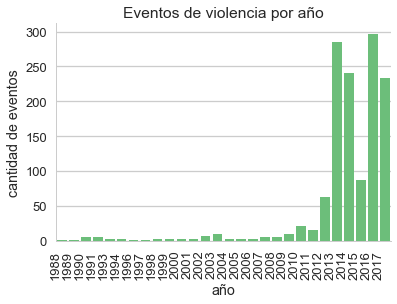

In [90]:
def per_year_events():
    yeardataset = dataset[(dataset.year != 0 )].sort_values('year', ascending=False).year.value_counts()
    ax = seaborn.barplot(data=yeardataset.to_frame().reset_index(),
        y='year', x='index', color='#5ecc71', orient="v")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
    ax.set_xlabel('año')
    ax.set_ylabel('cantidad de eventos')
    ax.set_title('Eventos de violencia por año')
    seaborn.despine()
per_year_events()

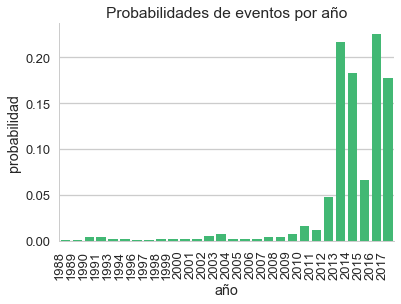

In [91]:
def per_year_freq_probabilities():
    yeardataset = dataset[(dataset.year != 0 )].sort_values('year', ascending=False).year.value_counts(normalize=True)
    ax = seaborn.barplot(data=yeardataset.to_frame().reset_index(),
        y='year', x='index', color='#2ecc71', orient="v")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
    ax.set_ylabel('probabilidad')
    ax.set_xlabel('año')
    ax.set_title('Probabilidades de eventos por año')
    seaborn.despine()
per_year_freq_probabilities()

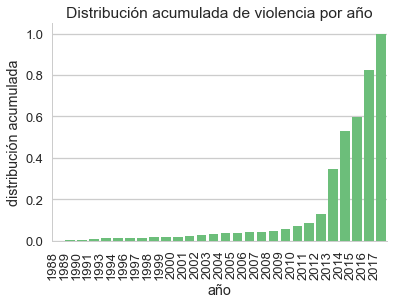

In [92]:
def per_year_cumulated_events():
    yearda = dataset[(dataset.year != 0 )].year.value_counts(normalize=True).to_frame().reset_index()
    yeardt = yearda.sort_values('index')
    yeardt['acum'] = yeardt['year'].cumsum()
    
    ax = seaborn.barplot(data=yeardt,
        y='acum', x='index', color='#5ecc71', orient="v")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
    ax.set_xlabel('año')
    ax.set_ylabel('distribución acumulada')
    ax.set_title('Distribución acumulada de violencia por año')
    seaborn.despine()
per_year_cumulated_events()

## Ejercicio 2

* Construir una tabla de frecuencia de probabilidades dado el evento X = ’provincia donde se desarrollo el hecho’

$$fdp(X)$$

* ¿Qué información adicional es necesaria para mostrar estos datos de manera más adecuada?
Seria importante conocer la población por 
* Muestre la distribución de los eventos visualmente. ¿Qué tipo de gráfico es más adecuado para mostrar esta información?

In [93]:
dfprov = dataset[(dataset.provincia != 0 )].provincia.value_counts(normalize=True).to_frame()
dfprov

,provincia
Buenos Aires,0.693182
Ciudad de Buenos Aires,0.083097
Córdoba,0.036932
Chubut,0.026278
Chaco,0.020597
Rio Negro,0.019176
Neuquen,0.014915
Santa Fe,0.014205
Salta,0.012074
Mendoza,0.012074


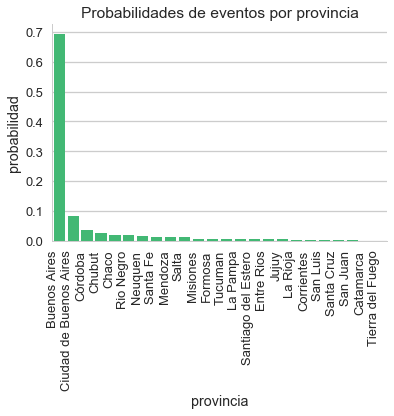

In [82]:
def per_prov_freq_probabilities():
    provdataset = dataset[(dataset.provincia != 0 )].sort_values('provincia', ascending=False).provincia.value_counts(normalize=True)
    ax = seaborn.barplot(data=provdataset.to_frame().reset_index(),
        y='provincia', x='index', color='#2ecc71', orient="v")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
    ax.set_ylabel('probabilidad')
    ax.set_xlabel('provincia')
    ax.set_title('Probabilidades de eventos por provincia')
    seaborn.despine()
per_prov_freq_probabilities()

### Ejercicio 3

* Construir una tabla de doble entrada donde se observen las función de distribución de probabilidades con las 2 variables aleatorias anteriores.
¿Son eventos independientes?

* Crear una imagen de dichas probabilidades con el gráfico que considere adecuado.


In [94]:
def prov_year_table():
    d = dataset[['year', 'provincia']]
    d = d.groupby(['provincia', 'year'])['year'].agg(['count']).reset_index()
    res = pandas.pivot_table(d, index=['provincia'], columns=['year']).reset_index()
    return res
prov_year_table()

provincia count                                          \
year                             0 1988 1989 1990 1991 1993 1994 1996 1997   
0               Buenos Aires  82.0  NaN  1.0  NaN  3.0  NaN  1.0  NaN  NaN   
1                  Catamarca   1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2                      Chaco   NaN  NaN  NaN  4.0  NaN  NaN  NaN  NaN  NaN   
3                     Chubut   3.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4     Ciudad de Buenos Aires   5.0  1.0  NaN  NaN  2.0  NaN  NaN  1.0  1.0   
5                 Corrientes   1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
6                    Córdoba   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
7                 Entre Rios   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
8                    Formosa   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
9                      Jujuy   2.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
10                  La Pampa   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
11                  La Rioja   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
12                   Mendoza   1.0  NaN  NaN  1.0  NaN  NaN  NaN  NaN  NaN   
13                  Misiones   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
14                   Neuquen   2.0  NaN  NaN  NaN  NaN  NaN  1.0  NaN  NaN   
15                 Rio Negro   2.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
16                     Salta   1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
17                  San Juan   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
18                  San Luis   1.0  NaN  NaN  NaN  NaN  2.0  NaN  NaN  NaN   
19                Santa Cruz   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
20                  Santa Fe   1.0  NaN  NaN  NaN  NaN  NaN  1.0  NaN  NaN   
21       Santiago del Estero   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
22          Tierra del Fuego   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
23                   Tucuman   1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

      ...                                                                
year  ...   2008 2009 2010 2011  2012   2013   2014  2015   2016   2017  
0     ...    3.0  4.0  8.0  9.0  21.0  196.0  164.0  49.0  233.0  187.0  
1     ...    NaN  NaN  NaN  NaN   NaN    NaN    NaN   NaN    1.0    NaN  
2     ...    NaN  NaN  NaN  NaN   7.0    8.0    3.0   3.0    3.0    1.0  
3     ...    NaN  NaN  3.0  NaN   3.0    6.0    9.0   2.0    2.0    7.0  
4     ...    1.0  5.0  1.0  2.0  10.0   23.0   24.0  10.0   11.0   12.0  
5     ...    NaN  NaN  NaN  NaN   NaN    2.0    NaN   1.0    1.0    NaN  
6     ...    NaN  NaN  2.0  3.0   4.0    5.0    4.0  13.0   11.0   10.0  
7     ...    NaN  NaN  NaN  NaN   1.0    NaN    8.0   NaN    NaN    NaN  
8     ...    NaN  NaN  NaN  NaN   NaN    3.0    3.0   1.0    1.0    1.0  
9     ...    1.0  NaN  1.0  NaN   1.0    1.0    1.0   1.0    NaN    NaN  
10    ...    NaN  NaN  NaN  NaN   1.0    5.0    NaN   NaN    4.0    NaN  
11    ...    NaN  NaN  3.0  1.0   NaN    NaN    NaN   NaN    NaN    NaN  
12    ...    NaN  NaN  NaN  NaN   NaN    4.0    4.0   2.0    2.0    2.0  
13    ...    NaN  NaN  NaN  NaN   2.0    2.0    4.0   NaN    NaN    1.0  
14    ...    NaN  NaN  NaN  NaN   9.0    4.0    2.0   1.0    NaN    NaN  
15    ...    NaN  NaN  NaN  1.0   NaN    6.0    7.0   NaN    7.0    3.0  
16    ...    NaN  NaN  1.0  NaN   NaN    2.0    1.0   NaN   10.0    1.0  
17    ...    NaN  NaN  NaN  NaN   NaN    NaN    NaN   NaN    3.0    NaN  
18    ...    NaN  NaN  NaN  NaN   NaN    1.0    NaN   NaN    NaN    NaN  
19    ...    NaN  NaN  2.0  NaN   NaN    1.0    NaN   NaN    1.0    NaN  
20    ...    NaN  NaN  NaN  NaN   NaN    8.0    2.0   2.0    NaN    5.0  
21    ...    NaN  NaN  NaN  NaN   NaN    3.0    1.0   NaN    4.0    2.0  
22    ...    NaN  1.0  NaN  NaN   NaN    NaN    NaN   NaN    NaN    NaN  
23    ...    NaN  NaN  NaN  NaN   2.0    NaN    NaN   2.0    3.0    2.0  

[24 rows x 30 columns]

## Ejercicio 4

Dada la variable aleatoria Z = ’contexto1 en el que se produjo el hecho’, calcular la probabilidad que el hecho sea producido en una dependencia de una fuerza de seguridad (penal, comisaría, etc)

$$ fdp(z=penal ~~ |~~  z=comisaria ~~ | ...) $$

In [119]:
def fdp_z(z):
    d= dataset[dataset['contexto1'] == z]
    
    return d.descripcion_institucion.value_counts(normalize=True)
fdp_z('Comisaría')


Policia Provincial                   0.783784
Policia Federal Argentina (PFA)      0.072072
Otras                                0.045045
Policia Metropolitana (GCBA)         0.036036
Servicio Penitenciario Provincial    0.036036
Personal de la Salud                 0.018018
Servicio Penitenciario Federal       0.009009
Name: descripcion_institucion, dtype: float64

In [118]:
pandas.crosstab(index=dataset['contexto1'],
    columns =dataset['descripcion_institucion'], margins = True)

descripcion_institucion,FFAA_Ejercito,FFAA_Fuerza Aerea,Gendarmería Nacional,Ninguna,Otras,Personal de la Salud,Policia Federal Argentina (PFA),Policia Metropolitana (GCBA),Policia Provincial,Prefectura Naval,Servicio Penitenciario Federal,Servicio Penitenciario Provincial,All
contexto1,,,,,,,,,,,,,
Centros de Alojamiento para Personas Menores de Edad,0,0,0,0,0,0,0,0,0,0,1,0,1
Centros de Detención Preventiva,0,0,0,0,0,0,0,0,5,0,0,1,6
Centros de Detención Previos al Juicio (Alcaidia),0,0,0,0,1,0,0,0,1,0,4,8,14
Comisaría,0,0,0,0,5,2,8,4,87,0,1,4,111
Domicilio Particular,0,0,0,0,1,0,5,0,13,0,1,1,21
Escuelas de Formación Fuerzas Nacionales,0,0,1,0,0,0,0,0,0,0,0,0,1
Escuelas de Formación Fuerzas Provinciales,1,0,0,0,0,0,0,0,2,0,0,0,3
Espacio Público,0,0,7,2,6,0,36,3,129,6,3,2,194
Establecimiento de Rehabilitación de Adicciones,0,0,0,0,0,1,0,0,0,0,0,0,1


## Ejercicio 5

Dada la variable aleatoria M = ‘existió violencia fisica’:
* ¿Que probabilidad existe que también tenga violencia psíquica? N = ‘existió violencia psíquica’

$$P(M~~|~~N)$$

* ¿Qué conclusión se puede formular de los datos que tenemos y los datos que obtenemos de los métodos probabilísticos?
Podemos decir que dado N= True (existió violencia física), la probabilidad de que M sea verdadera (existió violencia psíquica) es del 75%. Y 25% de que sea falsa. 
Si no se dio violencia física, la probabilidad de que sí se haya dado violencia psíquica es del 51%, y un 49% de que no se haya dado violencia psíquica.
* ¿Podemos concluir en que son eventos independientes dadas las muestras?
Dada la gran varianza (~25%) de la probabilidad de M, cosiderando a N como dada, se puede concluir que no son independientes.

In [120]:
# P(M | N)
def prob_M_N(N=True, M=True):
    if N:
        d = dataset[pandas.notnull(dataset['violencia_psiquica'])]
    else:
        d = dataset[pandas.isnull(dataset['violencia_psiquica'])]
    if M:
        return pandas.notnull(d['violencia_fisica']).value_counts(normalize=True)
    else:
        return pandas.isnull(d['violencia_fisica']).value_counts(normalize=True)
print('')
print('N = {N}, M = {M}\n{probs}\n\n'.format(
    N=True, M=True, probs=prob_M_N(True, True)))
print('N = {N}, M = {M}\n{probs}\n\n'.format(
    N=False, M=True, probs=prob_M_N(False, True)))



N = True, M = True
False    0.741273
True     0.258727
Name: violencia_fisica, dtype: float64


N = False, M = True
False    0.512605
True     0.487395
Name: violencia_fisica, dtype: float64


